In [1]:
import numpy as np
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m,1)
y = 4 + 3*X + np.random.randn(m,1)

In [2]:
X[:10],y[:10]

(array([[0.74908024],
        [1.90142861],
        [1.46398788],
        [1.19731697],
        [0.31203728],
        [0.31198904],
        [0.11616722],
        [1.73235229],
        [1.20223002],
        [1.41614516]]),
 array([[6.33428778],
        [9.40527849],
        [8.48372443],
        [5.60438199],
        [4.71643995],
        [5.29307969],
        [5.82639572],
        [8.67878666],
        [6.79819647],
        [7.74667842]]))

In [3]:
#y = ax + b => need to add x = 1 into every list
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X)
#=> y = 0.X (vector)

In [4]:
#using normal equation to calculate 0 theta
best_theta = np.linalg.inv(X_b.T @ X_b)@(X_b.T@y)
#theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [5]:
best_theta

array([[4.21509616],
       [2.77011339]])

In [6]:
X_new = np.array([[0], [2]])
y_predict = add_dummy_feature(X_new) @ best_theta
y_predict

array([[4.21509616],
       [9.75532293]])

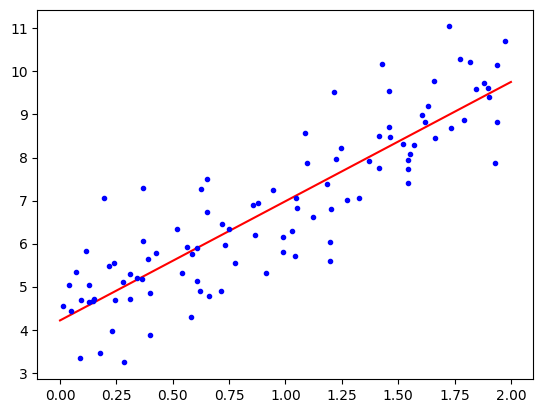

In [7]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.show()

In [8]:
learn_rate = 0.1
n_epochs = 10000
m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    theta = theta - learn_rate*(X_b.T @ (X_b @ theta - y)/m)
theta

array([[4.21509616],
       [2.77011339]])

In [9]:
max_epochs = 1000  # Maximum number of epochs
epsilon = 1e-5     # Tolerance for convergence
for epoch in range(max_epochs):
    theta = theta - learn_rate*(X_b.T @ (X_b @ theta - y)/m)
    
    # Check convergence criterion
    if np.linalg.norm(theta) < epsilon:
        break  # Stop if gradient is small enough
theta

array([[4.21509616],
       [2.77011339]])

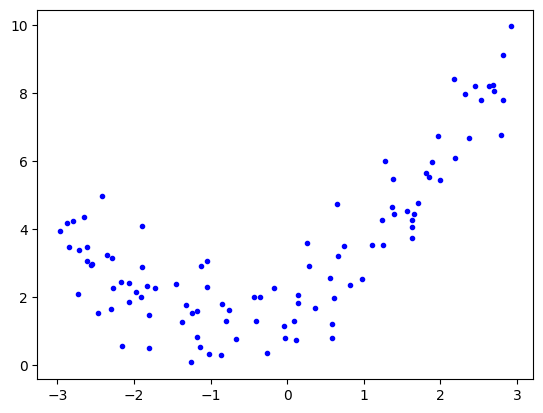

In [10]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, "b.")

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[:10],X_poly[:10]
## y = ax_1^2 + bx_1 + c. need to find a b c

(array([[-0.75275929],
        [ 2.70428584],
        [ 1.39196365],
        [ 0.59195091],
        [-2.06388816],
        [-2.06403288],
        [-2.65149833],
        [ 2.19705687],
        [ 0.60669007],
        [ 1.24843547]]),
 array([[-0.75275929,  0.56664654],
        [ 2.70428584,  7.3131619 ],
        [ 1.39196365,  1.93756281],
        [ 0.59195091,  0.35040587],
        [-2.06388816,  4.25963433],
        [-2.06403288,  4.26023172],
        [-2.65149833,  7.03044338],
        [ 2.19705687,  4.82705891],
        [ 0.60669007,  0.36807284],
        [ 1.24843547,  1.55859111]]))

In [12]:
## y = ax_1^2 + bx_1 + c. need to find a b c
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

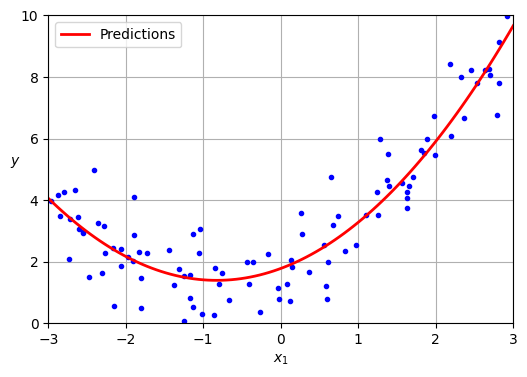

In [13]:
# extra code – this cell generates and saves Figure 4–13

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

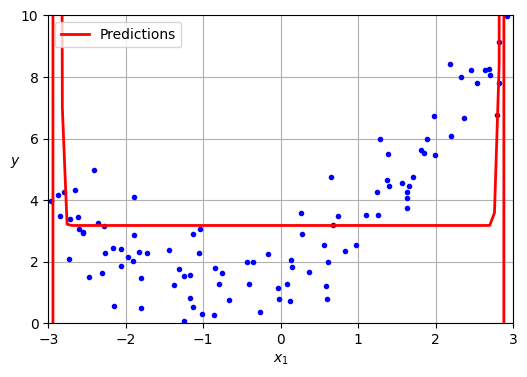

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=300, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[:10],X_poly[:10]
## y = ax_1^2 + bx_1 + c. need to find a b c
## y = ax_1^2 + bx_1 + c. need to find a b c
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_
# extra code – this cell generates and saves Figure 4–13

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

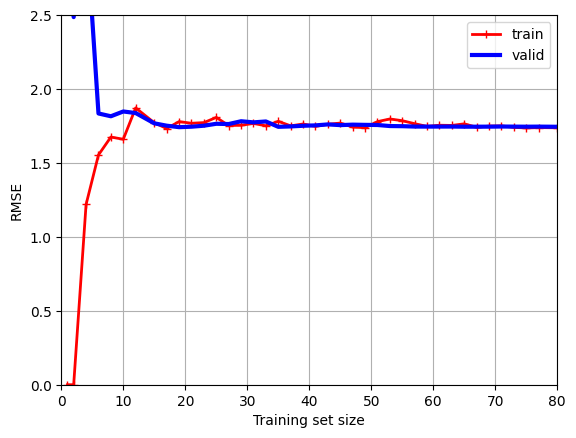

In [15]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
##train_scores la diem so tren 5 tap training vi cv = 5
##valid_scores la diem so dua tren tap test[k] sau khi train k-1 tap con lai
train_errors = -train_scores.mean(axis = 1)
valid_errors = -valid_scores.mean(axis = 1)
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])
plt.show()

In [16]:
# using ridge regression + close form equation
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1, solver = "cholesky")
ridge_reg.fit(X,y)
ridge_reg.intercept_,ridge_reg.coef_

(array([3.56396759]), array([[0.84335326]]))

In [17]:
#using ridge regrgession + GDA
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None,
                        max_iter=1000, eta0=0.01, random_state=42)
#penalty hyperparameter is l2 norm, chuan L2
sgd_reg.fit(X,y.ravel())
sgd_reg.intercept_,sgd_reg.coef_

(array([3.56610435]), array([0.84146454]))

In [18]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris(as_frame=True)
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
iris.target.unique()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [21]:
def sigmoid(t):
    return 1/(1+np.exp(-t))
sigmoid(0.1)

0.52497918747894

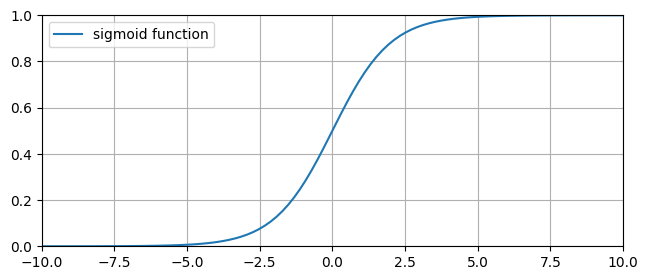

In [22]:
X = np.linspace(-10,10,100)
plt.figure(figsize=(7.5,3))
plt.plot(X,sigmoid(X), label = 'sigmoid function')
plt.grid()
plt.legend(loc = "upper left")
plt.axis([-10,10,0,1])
plt.show()

In [23]:
def log_reg(y,y_pred):
    cost = - (y * np.log(y_pred) + ((1 - y) * np.log(1 - y_pred)))
    return cost
y, y_dash = 0, 0.6
print(f"log_loss({y}, {y_dash}) = {log_reg(y, y_dash)}")

log_loss(0, 0.6) = 0.916290731874155


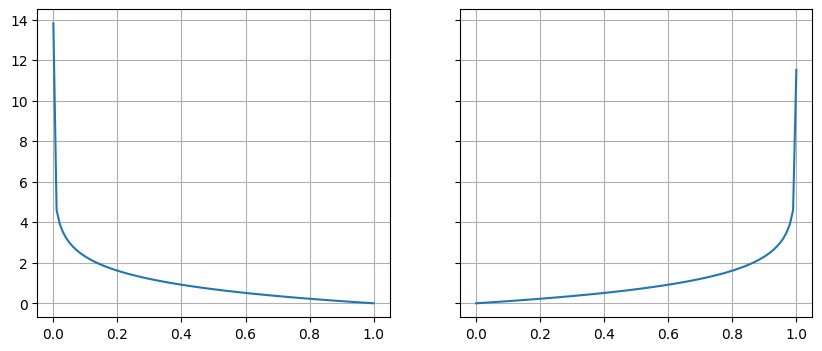

In [24]:
fig, ax = plt.subplots(1,2,figsize = (10,4), sharex= True, sharey = True)
y_pred = np.linspace(0.000001,0.99999,100)
ax[0].plot(y_pred, log_reg(1,y_pred))
ax[0].grid()
ax[1].plot(y_pred, log_reg(0,y_pred))
ax[1].grid()

In [25]:
def cost_function(y,y_pred):
    cost = 0;
    for i in range(len(y)):
        cost += log_reg(y[i],y_pred[i])
    cost=cost/m
    return cost;

In [26]:
y, y_dash = np.array([1,0,0,1]), np.array([0.9999,0.00002,0.0001,0.95])
print(f"log_loss({y}, {y_dash}) = {cost_function(y, y_dash)}")

log_loss([1 0 0 1], [9.999e-01 2.000e-05 1.000e-04 9.500e-01]) = 0.0005151330458821996


In [27]:
def cost_functionlog(X,y,w,b):
    ##X, w 
    z = []
    for i in range(len(X)):
        s = 0;
        for j in range(len(w)):
            s = s + X[i,j]*w[j]
        z.append(s+b)
    z = np.array(z)
    y_pred = sigmoid(z)
    return cost_function(y,y_pred)

In [28]:
X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"cost_functionlog(X = {X}, y = {y}, w = {w}, b = {b}) = {cost_functionlog(X, y, w, b)}")


cost_functionlog(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = 0.11000016701569812


[Text(0.5, 0, 'w'), Text(0.5, 0.5, 'b')]

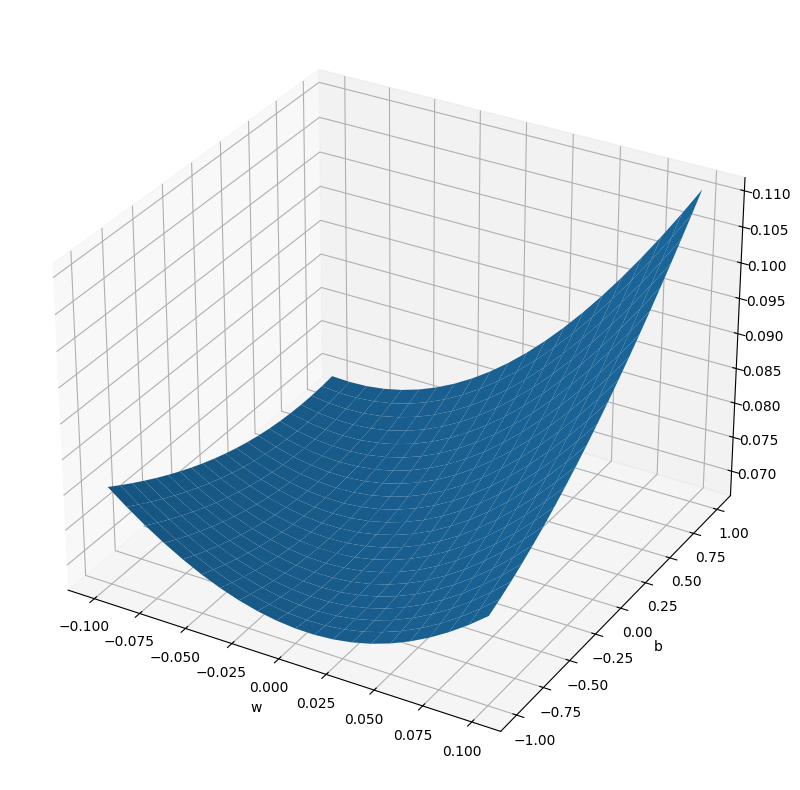

In [29]:
from mpl_toolkits.mplot3d import Axes3D
w, b = np.meshgrid(np.linspace(-0.1, 0.1, 21), np.linspace(-1, 1, 21))
X = np.array([1.56, 0.76 , 0.08, 9.71, 4.65, 4.35, 7.34, 0.91, 9.82, 9.05]).reshape((10, 1))
y = np.array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0])
cost = np.array([[cost_functionlog(X, y, np.array([w0]), b0) for b0 in b[:, 0]] for w0 in w[0]])
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = '3d')
ax.plot_surface(w, b, cost)
ax.set(xlabel = "w", ylabel = "b")

In [30]:
def gradient_logreg(X,y,w,b):
    grad_w,grad_b = np.zeros(len(w)), 0
    m = len(X)
    n = len(w)
    for i in range(m):
        s = 0
        for j in range(n):
            s+= X[i,j]*w[j]
        y_pred = sigmoid(s+b)
        for j in range(n):
            grad_w[j] += (y_pred - y[i]) * X[i,j]
            grad_b += y_dash - y[i]
    return grad_w/m,grad_b/m
X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"grad_logreg_vec(X = {X}, y = {y}, w = {w}, b = {b}) = {gradient_logreg(X, y, w, b)}")

grad_logreg_vec(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = (array([-4.99991649,  4.99991649]), array([ 0.9998 , -0.99996, -0.9998 ,  0.9    ]))
